In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [297]:
df = df = pd.read_excel('DADOS_PIM.xlsx',index_col='ANOMES',parse_dates=True)

In [298]:
df.index = pd.to_datetime(df.index)

In [299]:
df = df.dropna()

In [300]:
len(df)

255

In [301]:
train = df.iloc[:231]
test = df.iloc[231:]

In [302]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [303]:
df.head(),df.tail()

(                  PIM
 ANOMES               
 2002-01-01  9076288.0
 2002-01-02  9302618.0
 2002-01-03  9240696.0
 2002-01-04  9252369.0
 2002-01-05  9249650.0,
                    PIM
 ANOMES                
 2022-01-11   9992010.0
 2022-01-12   9991010.0
 2023-01-01   9963412.0
 2023-01-02   9945228.0
 2023-01-03  10052247.0)

In [304]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [305]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [306]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [307]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.32711186 0.37518484 0.36203248]
Predict this y: 
 [[0.36451185]]


In [308]:
X.shape

(1, 3, 1)

In [309]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [310]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [311]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [312]:
model.fit(generator,epochs=2000)

Epoch 1/2000
219/219 [==============================] - 2s 3ms/step - loss: 0.0255
Epoch 2/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0093
Epoch 3/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0096
Epoch 4/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0082
Epoch 5/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0083
Epoch 6/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 7/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0055
Epoch 8/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0056
Epoch 9/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 10/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0048
Epoch 11/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 12/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0046
E

219/219 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 99/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 100/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0029
Epoch 101/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 102/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0029
Epoch 103/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0029
Epoch 104/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 105/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 106/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 107/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 108/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 109/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0

219/219 [==============================] - 1s 3ms/step - loss: 0.0026
Epoch 195/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 196/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0026
Epoch 197/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0026
Epoch 198/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 199/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 200/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0026
Epoch 201/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 202/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0026
Epoch 203/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 204/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 205/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.

219/219 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 291/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 292/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 293/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 294/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 295/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0022
Epoch 296/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 297/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 298/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 299/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 300/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 301/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.

219/219 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 387/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 388/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 389/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 390/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 391/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 392/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 393/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 394/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 395/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0020
Epoch 396/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 397/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.

219/219 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 483/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 484/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 485/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 486/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 487/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 488/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 489/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 490/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 491/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 492/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 493/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.

219/219 [==============================] - 1s 4ms/step - loss: 0.0010
Epoch 579/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 580/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 581/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 582/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 583/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 584/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 585/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 586/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 587/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 588/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 589/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.

219/219 [==============================] - 1s 4ms/step - loss: 8.6994e-04
Epoch 673/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 674/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 675/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 676/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 677/2000
219/219 [==============================] - 1s 4ms/step - loss: 0.0010
Epoch 678/2000
219/219 [==============================] - 1s 4ms/step - loss: 8.1367e-04
Epoch 679/2000
219/219 [==============================] - 1s 4ms/step - loss: 7.7049e-04
Epoch 680/2000
219/219 [==============================] - 1s 4ms/step - loss: 7.4202e-04
Epoch 681/2000
219/219 [==============================] - 1s 4ms/step - loss: 7.2569e-04
Epoch 682/2000
219/219 [==============================] - 1s 4ms/step - loss: 6.7944e-04
Epoch 683/2000
219/219 [==============================] 

219/219 [==============================] - 1s 4ms/step - loss: 6.1925e-04
Epoch 765/2000
219/219 [==============================] - 1s 4ms/step - loss: 6.1360e-04
Epoch 766/2000
219/219 [==============================] - 1s 4ms/step - loss: 5.5361e-04
Epoch 767/2000
219/219 [==============================] - 1s 4ms/step - loss: 6.3432e-04
Epoch 768/2000
219/219 [==============================] - 1s 4ms/step - loss: 7.6058e-04
Epoch 769/2000
219/219 [==============================] - 1s 4ms/step - loss: 5.8470e-04
Epoch 770/2000
219/219 [==============================] - 1s 4ms/step - loss: 6.4065e-04
Epoch 771/2000
219/219 [==============================] - 1s 4ms/step - loss: 5.9711e-04
Epoch 772/2000
219/219 [==============================] - 1s 4ms/step - loss: 6.5625e-04
Epoch 773/2000
219/219 [==============================] - 1s 4ms/step - loss: 5.4471e-04
Epoch 774/2000
219/219 [==============================] - 1s 4ms/step - loss: 5.3466e-04
Epoch 775/2000
219/219 [============

219/219 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 858/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 859/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 860/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 861/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 862/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 863/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0010
Epoch 864/2000
219/219 [==============================] - 1s 3ms/step - loss: 9.0751e-04
Epoch 865/2000
219/219 [==============================] - 1s 3ms/step - loss: 8.5005e-04
Epoch 866/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 867/2000
219/219 [==============================] - 1s 3ms/step - loss: 8.0111e-04
Epoch 868/2000
219/219 [==============================] - 1s 3ms/ste

Epoch 950/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.8693e-04
Epoch 951/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.9529e-04
Epoch 952/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.2787e-04
Epoch 953/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.4654e-04
Epoch 954/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.9726e-04
Epoch 955/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.4990e-04
Epoch 956/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.8751e-04
Epoch 957/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.3352e-04
Epoch 958/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.8522e-04
Epoch 959/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.6195e-04
Epoch 960/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.5853e-04
Epoch 961/2000
219/21

Epoch 1042/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.8609e-04
Epoch 1043/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.8699e-04
Epoch 1044/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.4600e-04
Epoch 1045/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.6037e-04
Epoch 1046/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.6682e-04
Epoch 1047/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.0183e-04
Epoch 1048/2000
219/219 [==============================] - 1s 3ms/step - loss: 5.6772e-04
Epoch 1049/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.9171e-04
Epoch 1050/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.8759e-04
Epoch 1051/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.9430e-04
Epoch 1052/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.2184e-04
Epoch 1053

219/219 [==============================] - 1s 3ms/step - loss: 2.9945e-04
Epoch 1134/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.8402e-04
Epoch 1135/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.6457e-04
Epoch 1136/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.8784e-04
Epoch 1137/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.8801e-04
Epoch 1138/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.1056e-04
Epoch 1139/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.4546e-04
Epoch 1140/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.1837e-04
Epoch 1141/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.9338e-04
Epoch 1142/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.1667e-04
Epoch 1143/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.9437e-04
Epoch 1144/2000
219/219 [=

219/219 [==============================] - 1s 3ms/step - loss: 9.8840e-04
Epoch 1225/2000
219/219 [==============================] - 1s 3ms/step - loss: 6.1596e-04
Epoch 1226/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.6806e-04
Epoch 1227/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.5372e-04
Epoch 1228/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.5569e-04
Epoch 1229/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.2969e-04
Epoch 1230/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.1034e-04
Epoch 1231/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.0413e-04
Epoch 1232/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.0206e-04
Epoch 1233/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.9111e-04
Epoch 1234/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.3356e-04
Epoch 1235/2000
219/219 [=

219/219 [==============================] - 1s 3ms/step - loss: 1.8821e-04
Epoch 1316/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.1866e-04
Epoch 1317/2000
219/219 [==============================] - 1s 3ms/step - loss: 5.2065e-04
Epoch 1318/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.0455e-04
Epoch 1319/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.1108e-04
Epoch 1320/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.8963e-04
Epoch 1321/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.6489e-04
Epoch 1322/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.7523e-04
Epoch 1323/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.4335e-04
Epoch 1324/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.5080e-04
Epoch 1325/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.0454e-04
Epoch 1326/2000
219/219 [=

219/219 [==============================] - 1s 3ms/step - loss: 2.7539e-04
Epoch 1407/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.7086e-04
Epoch 1408/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.1229e-04
Epoch 1409/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.5378e-04
Epoch 1410/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.9199e-04
Epoch 1411/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.7834e-04
Epoch 1412/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.1689e-04
Epoch 1413/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.0912e-04
Epoch 1414/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.2198e-04
Epoch 1415/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.5280e-04
Epoch 1416/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.5469e-04
Epoch 1417/2000
219/219 [=

219/219 [==============================] - 1s 3ms/step - loss: 1.9637e-04
Epoch 1498/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.8172e-04
Epoch 1499/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.7813e-04
Epoch 1500/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.4356e-04
Epoch 1501/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.1268e-04
Epoch 1502/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.0078e-04
Epoch 1503/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.9585e-04
Epoch 1504/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.6402e-04
Epoch 1505/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.8937e-04
Epoch 1506/2000
219/219 [==============================] - 1s 3ms/step - loss: 5.7751e-04
Epoch 1507/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.8094e-04
Epoch 1508/2000
219/219 [=

219/219 [==============================] - 1s 4ms/step - loss: 1.0102e-04
Epoch 1589/2000
219/219 [==============================] - 1s 4ms/step - loss: 1.1780e-04
Epoch 1590/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.7048e-04
Epoch 1591/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.4237e-04
Epoch 1592/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.1095e-04
Epoch 1593/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.7200e-04
Epoch 1594/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.1075e-04
Epoch 1595/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.4443e-04
Epoch 1596/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.0494e-04
Epoch 1597/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.6556e-04
Epoch 1598/2000
219/219 [==============================] - 1s 3ms/step - loss: 5.1623e-04
Epoch 1599/2000
219/219 [=

219/219 [==============================] - 1s 3ms/step - loss: 1.5038e-04
Epoch 1680/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0038
Epoch 1681/2000
219/219 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 1682/2000
219/219 [==============================] - 1s 3ms/step - loss: 8.4517e-04
Epoch 1683/2000
219/219 [==============================] - 1s 3ms/step - loss: 3.7039e-04
Epoch 1684/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.2974e-04
Epoch 1685/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.5925e-04
Epoch 1686/2000
219/219 [==============================] - 1s 3ms/step - loss: 9.7021e-05
Epoch 1687/2000
219/219 [==============================] - 1s 3ms/step - loss: 7.8429e-05
Epoch 1688/2000
219/219 [==============================] - 1s 3ms/step - loss: 7.5100e-05
Epoch 1689/2000
219/219 [==============================] - 1s 3ms/step - loss: 6.7193e-05
Epoch 1690/2000
219/219 [=========

219/219 [==============================] - 1s 3ms/step - loss: 1.3215e-04
Epoch 1771/2000
219/219 [==============================] - 1s 3ms/step - loss: 7.9961e-05
Epoch 1772/2000
219/219 [==============================] - 1s 3ms/step - loss: 8.9868e-05
Epoch 1773/2000
219/219 [==============================] - 1s 3ms/step - loss: 8.8549e-05
Epoch 1774/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.5689e-04
Epoch 1775/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.4009e-04
Epoch 1776/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.6083e-04
Epoch 1777/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.6962e-04
Epoch 1778/2000
219/219 [==============================] - 1s 3ms/step - loss: 2.4720e-04
Epoch 1779/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.3163e-04
Epoch 1780/2000
219/219 [==============================] - 1s 3ms/step - loss: 7.5823e-05
Epoch 1781/2000
219/219 [=

219/219 [==============================] - 1s 3ms/step - loss: 5.5005e-05
Epoch 1862/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.0533e-05
Epoch 1863/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.2006e-05
Epoch 1864/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.0020e-05
Epoch 1865/2000
219/219 [==============================] - 1s 3ms/step - loss: 7.1937e-05
Epoch 1866/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.1238e-04
Epoch 1867/2000
219/219 [==============================] - 1s 3ms/step - loss: 4.4227e-04
Epoch 1868/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.9554e-04
Epoch 1869/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.1674e-04
Epoch 1870/2000
219/219 [==============================] - 1s 3ms/step - loss: 8.3402e-05
Epoch 1871/2000
219/219 [==============================] - 1s 3ms/step - loss: 6.5884e-05
Epoch 1872/2000
219/219 [=

219/219 [==============================] - 1s 3ms/step - loss: 1.3442e-04
Epoch 1953/2000
219/219 [==============================] - 1s 3ms/step - loss: 9.5794e-05
Epoch 1954/2000
219/219 [==============================] - 1s 3ms/step - loss: 7.8308e-05
Epoch 1955/2000
219/219 [==============================] - 1s 3ms/step - loss: 6.4153e-05
Epoch 1956/2000
219/219 [==============================] - 1s 3ms/step - loss: 8.4546e-05
Epoch 1957/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.0431e-04
Epoch 1958/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.3775e-04
Epoch 1959/2000
219/219 [==============================] - 1s 3ms/step - loss: 1.7855e-04
Epoch 1960/2000
219/219 [==============================] - 1s 3ms/step - loss: 7.1922e-05
Epoch 1961/2000
219/219 [==============================] - 1s 3ms/step - loss: 7.2098e-05
Epoch 1962/2000
219/219 [==============================] - 1s 3ms/step - loss: 5.9482e-05
Epoch 1963/2000
219/219 [=

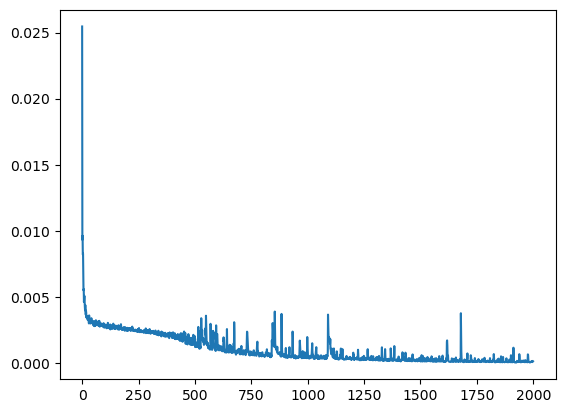

In [313]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [314]:
last_train_batch = scaled_train[-12:]

In [315]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [316]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 134ms/step


array([[0.49295825]], dtype=float32)

In [317]:
scaled_test

array([[0.52103015],
       [0.55057359],
       [0.54145177],
       [0.50396682],
       [0.5117246 ],
       [0.50483385],
       [0.49489895],
       [0.49555421],
       [0.52831639],
       [0.52778857],
       [0.54063869],
       [0.52666391],
       [0.53515043],
       [0.53059462],
       [0.52803581],
       [0.54217415],
       [0.51772326],
       [0.49089708],
       [0.51771519],
       [0.52161319],
       [0.52140079],
       [0.51553892],
       [0.5116766 ],
       [0.53440766]])

In [318]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [319]:
test_scaled = test

In [320]:
current_batch

array([[[0.46224034],
        [0.45325577],
        [0.42367357],
        [0.41447276],
        [0.384967  ],
        [0.37544638],
        [0.37598488],
        [0.36933404],
        [0.38399625],
        [0.37324843],
        [0.3778818 ],
        [0.37998003]]])

In [321]:
test_predictions

[array([0.49295825], dtype=float32),
 array([0.47336748], dtype=float32),
 array([0.51200783], dtype=float32),
 array([0.49742088], dtype=float32),
 array([0.53138167], dtype=float32),
 array([0.540407], dtype=float32),
 array([0.5400805], dtype=float32),
 array([0.5246114], dtype=float32),
 array([0.5266663], dtype=float32),
 array([0.5197512], dtype=float32),
 array([0.50872105], dtype=float32),
 array([0.48475796], dtype=float32),
 array([0.46224034], dtype=float32),
 array([0.45325577], dtype=float32),
 array([0.42367357], dtype=float32),
 array([0.41447276], dtype=float32),
 array([0.384967], dtype=float32),
 array([0.37544638], dtype=float32),
 array([0.37598488], dtype=float32),
 array([0.36933404], dtype=float32),
 array([0.38399625], dtype=float32),
 array([0.37324843], dtype=float32),
 array([0.3778818], dtype=float32),
 array([0.37998003], dtype=float32)]

In [322]:
test.head()

,PIM
ANOMES,
2021-01-04,9989265.0
2021-01-05,10128357.0
2021-01-06,10085411.0
2021-01-07,9908930.0
2021-01-08,9945454.0


In [323]:
true_predictions = scaler.inverse_transform(test_predictions)

In [324]:
test['Predictions'] = true_predictions

C:\Users\chris\AppData\Local\Temp\ipykernel_9540\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [325]:
test

,PIM,Predictions
ANOMES,,
2021-01-04,9989265.0,9.857101e+06
2021-01-05,10128357.0,9.764867e+06
2021-01-06,10085411.0,9.946787e+06
2021-01-07,9908930.0,9.878111e+06
2021-01-08,9945454.0,1.003800e+07
2021-01-09,9913012.0,1.008049e+07
2021-01-10,9866238.0,1.007895e+07
2021-01-11,9869323.0,1.000613e+07
2021-01-12,10023569.0,1.001580e+07


<Axes: xlabel='ANOMES'>

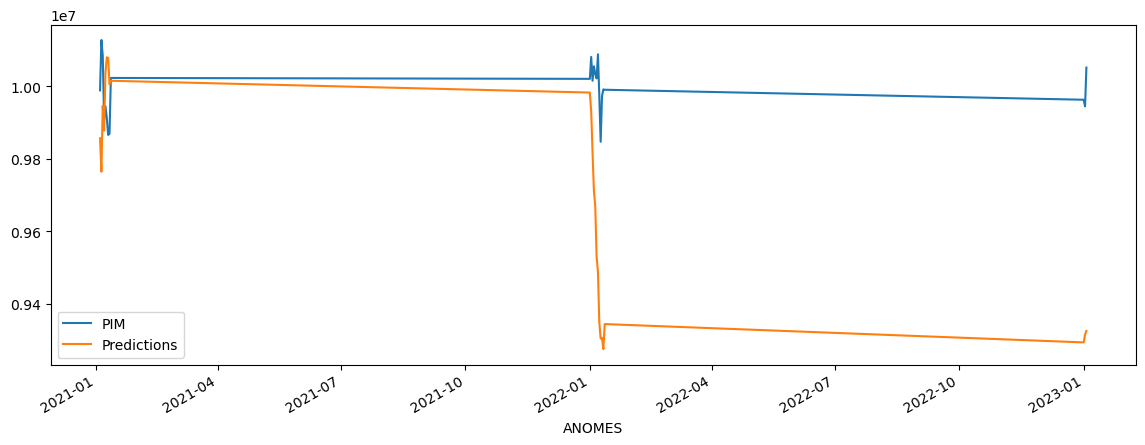

In [326]:
test.plot(figsize=(14,5))

In [327]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['PIM'],test['Predictions']))
print(rmse)
mape= mean_absolute_percentage_error(test['PIM'], test['Predictions'])
print(mape)

438969.03468776296
0.0362484627755929
